<a href="https://colab.research.google.com/github/julichitai/learning_NN/blob/CV_Samsung/pytorch_sin_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 6)


## Train dataset

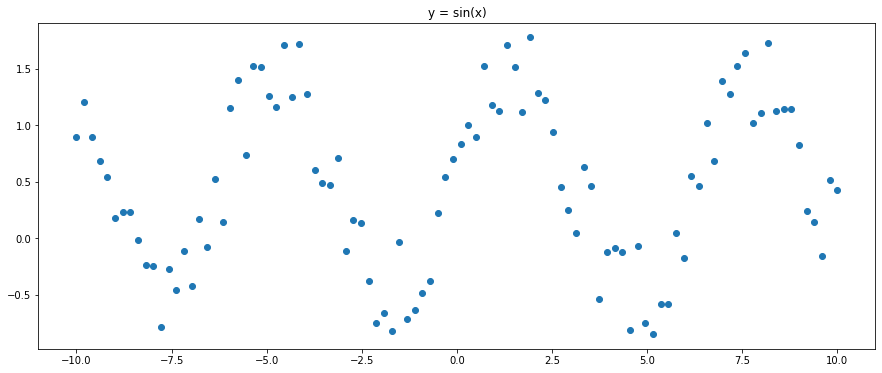

In [23]:
size = 100
x_train = torch.linspace(-10, 10, 100)
y_train = torch.sin(x_train) + torch.rand(size)

plt.scatter(x_train, y_train)
plt.title('y = sin(x)');

In [24]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);


## Validation dataset


Text(0.5, 1.0, 'y = sin(x)')

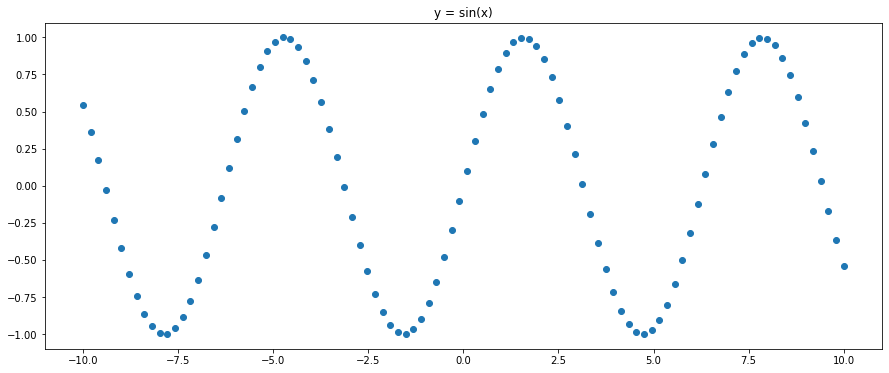

In [25]:
x_valid = torch.linspace(-10, 10, size)
y_valid = torch.sin(x_valid)

plt.scatter(x_valid, y_valid)
plt.title('y = sin(x)')

In [ ]:
x_valid.unsqueeze_(1)
y_valid.unsqueeze_(1);

## Model construction

In [83]:
num_epoch = 10000
hidden_layers = 50
input_size = 1
output_size = 1
learning_rate = 0.01

In [84]:
from torch import nn
from torch.optim import lr_scheduler


class SinNet(nn.Module):
    def __init__(self, input_size, hidden_layer, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_layer)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layer, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = SinNet(input_size, hidden_layers, output_size)

In [85]:
def mse(true, pred):
    return torch.mean(torch.square(true - pred))


criterion = mse
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.05, patience=1000, mode='min', verbose=True)

## Prediction

Loss is 1.099583625793457


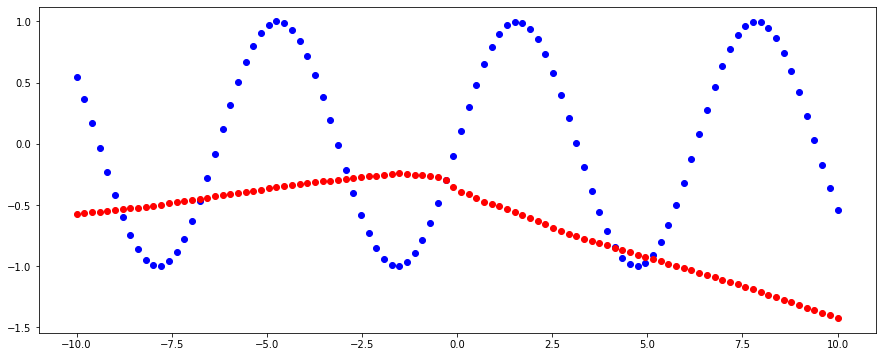

In [86]:
def predict(model, x, y):
    out = model(x)
    loss = criterion(out, y)
    print(f'Loss is {loss}')

    plt.scatter(x, y, c='b', label='ground truth')
    plt.scatter(x, out.detach().numpy(), c='r', label='predicted')


predict(model, x_valid, y_valid)

## Training procedure

Epoch [1000/10000]. Loss is 0.37616947293281555
Epoch [2000/10000]. Loss is 0.31795257329940796
Epoch [3000/10000]. Loss is 0.34599602222442627
Epoch [4000/10000]. Loss is 0.2501670718193054
Epoch [5000/10000]. Loss is 0.24553973972797394
Epoch  5154: reducing learning rate of group 0 to 5.0000e-04.
Epoch [6000/10000]. Loss is 0.2513425350189209
Epoch  6155: reducing learning rate of group 0 to 2.5000e-05.
Epoch [7000/10000]. Loss is 0.2513788640499115
Epoch  7156: reducing learning rate of group 0 to 1.2500e-06.
Epoch [8000/10000]. Loss is 0.2513503134250641
Epoch  8157: reducing learning rate of group 0 to 6.2500e-08.
Epoch [9000/10000]. Loss is 0.2513507306575775
Epoch  9158: reducing learning rate of group 0 to 3.1250e-09.
Epoch [10000/10000]. Loss is 0.2513507306575775
Loss is 0.2513507306575775


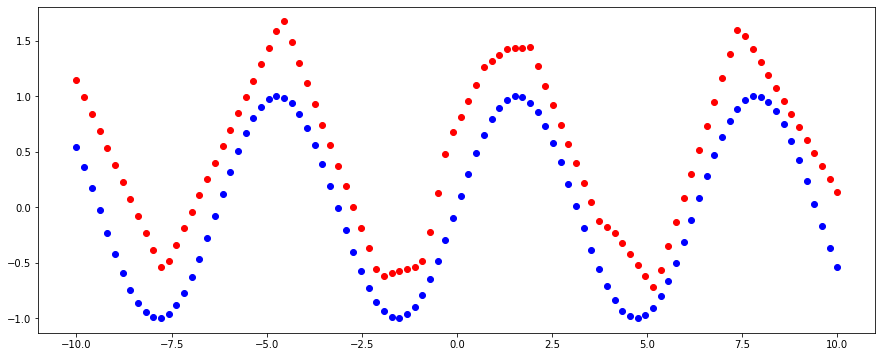

In [87]:
for epoch in range(num_epoch):
    out = model(x_train)
    loss = criterion(y_train, out)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        loss = criterion(y_valid, model(x_valid))
        scheduler.step(loss)

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epoch}]. Loss is {loss}')
        

predict(model, x_valid, y_valid)